In [1]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
cpu = pd.read_csv('/root/aateef-thesis/jupyter/csv/cpu.csv', parse_dates = [0], index_col = [0])

In [3]:
cpu

,Cpu_Used
Date,
2020-05-12,78
2020-06-12,81
2020-07-12,64
2020-08-12,79
2020-09-12,83
2020-10-12,87
2020-11-12,77
2020-12-12,69


<AxesSubplot:xlabel='Date'>

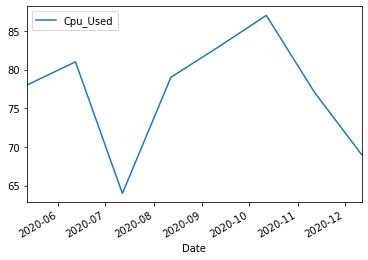

In [4]:
cpu.plot()

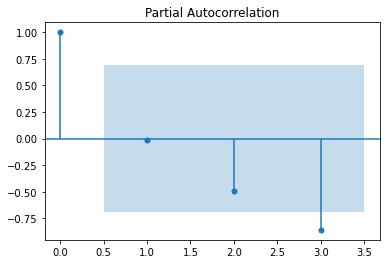

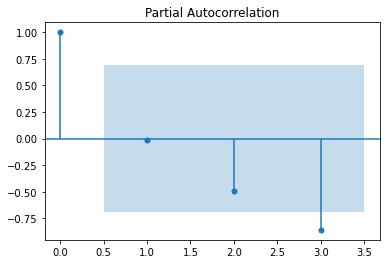

In [5]:
plot_pacf(cpu, lags=3)

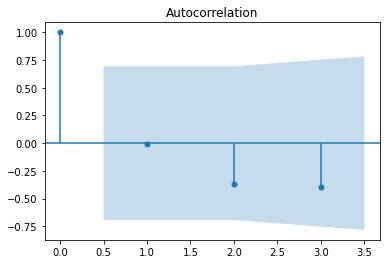

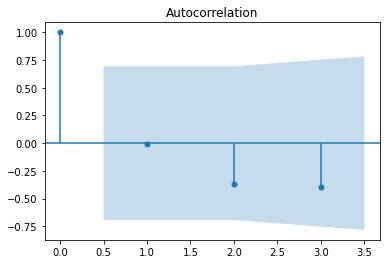

In [15]:
plot_acf(cpu, lags=3)

In [7]:
cpu.describe()


,Cpu_Used
count,8.000000
mean,77.250000
std,7.459414
min,64.000000
25%,75.000000
50%,78.500000
75%,81.500000
max,87.000000


In [8]:
cpu_mod = ARIMA(cpu, order=(2,1,0))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informa

In [9]:
cpu_mod_fit = cpu_mod.fit()

In [10]:
cpu_mod_fit.aic


59.4776076765867

In [11]:
cpu_forecast = cpu_mod_fit.forecast(steps = 6)[0]


In [12]:
cpu_forecast


array([72.95687942, 72.43553754, 70.86141082, 70.60594539, 70.13019528,
       69.4457022 ])

In [14]:
os.system("echo %s >> /root/aateef-thesis/jupyter/output/cpu_pred_output"%cpu_forecast)

0